In [100]:
import pandas as pd
from glob import glob
import altair as alt
alt.renderers.enable('notebook');
#alt.data_transformers.enable('json')  # writes data to file instead of embedding in notebook (only needed for big data)

In [12]:
df = pd.read_csv('data/yob1880.txt', header=None, names=['name', 'gender', 'count'])

In [13]:
display(df.head())
display(df.tail())


,name,gender,count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


,name,gender,count
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [15]:
df["year"] = '1880' 
df.head(2)

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


In [63]:
# TODO: change to all years.
files = sorted(glob('data/yob*.txt'))
dfs = []
for file in files:
    year = int(file.split('yob')[1][:4])
    df = pd.read_csv(file, header=None, names=['name', 'gender', 'count'])
    df['year'] = year
    dfs.append(df)


In [47]:
df1 = pd.DataFrame([[1,2,3]],[4],columns=['year', 'count', 'foo'])
df2 = pd.DataFrame([[11,22,33]],[4],columns=['year', 'count', 'foo'])
pd.concat([df1,df2], ignore_index=True)

,year,count,foo
0,1,2,3
1,11,22,33


In [64]:
all_records = pd.concat(dfs, ignore_index=True)
display(all_records.head(), all_records.tail())

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


,name,gender,count,year
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


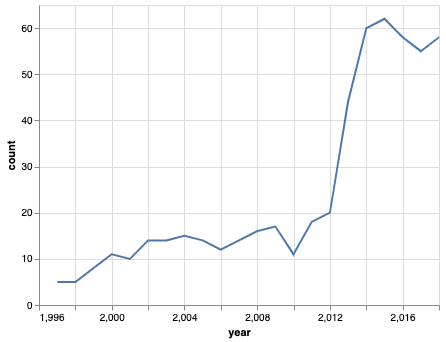

In [182]:
# test1 = all_records[all_records["name"] == "Benjamin"]
groups = all_records.groupby(['name','gender'])
#groups_both = all_records.groupby('name')
#df_benjamin_both = groups_both.get_group("Benjamin")

for item in groups:
    # display(item[0], item[1])
    break

df_benjamin = groups.get_group(("Tyrion", "M"))
alt.Chart(df_benjamin).mark_line().encode(x='year',y='count')


In [183]:
df_grouped_by_year = all_records.groupby("year")

for item in df_total_pop:
    # display(item[1])
    break

#df_total_pop = df_grouped_by_year.aggregate(sum).reset_index()
df_total_pop = df_grouped_by_year['count'].aggregate(sum).to_frame().reset_index()


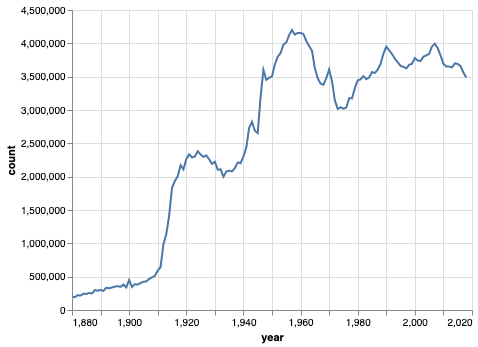

In [185]:
alt.Chart(df_total_pop).mark_line().encode(x='year',y='count')

In [149]:
# Joining Tables

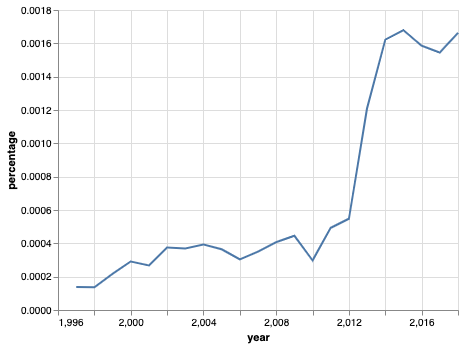

In [187]:
# df_total_pop, df_benjamin

df_merged = pd.merge(df_benjamin, df_total_pop, on='year')
df_merged['percentage'] = df_merged['count_x'] / df_merged['count_y'] * 100

alt.Chart(df_merged).mark_line().encode(x='year',y='percentage')

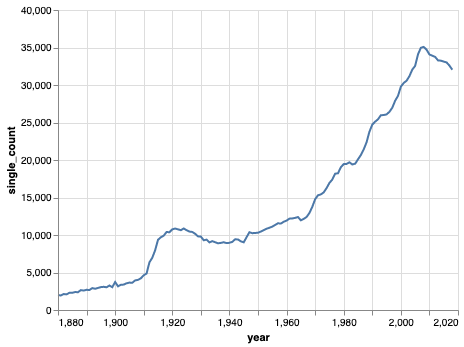

In [195]:
temp = all_records['single_count'] = 1
groups = all_records.groupby(['year'])

count_by_year = groups['single_count'].agg(sum).to_frame().reset_index()

alt.Chart(count_by_year).mark_line().encode(x='year',y='single_count')

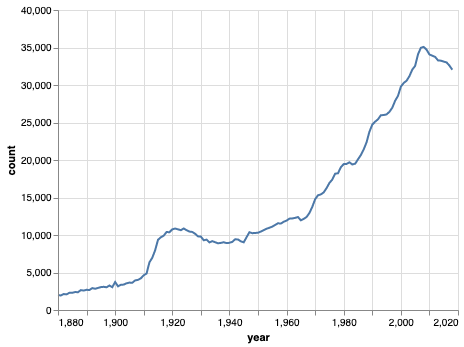

In [211]:
groups = all_records.groupby(['year'])
count_by_year = groups['count'].agg('count').to_frame().reset_index()

alt.Chart(count_by_year).mark_line().encode(x='year',y='count')

In [270]:
names = all_records['name']
all_records['last_letter'] = [string[-1] for string in names]
last_letter_group = all_records.groupby(["last_letter", "gender"])


last_letter_group = last_letter_group['count'].agg('count').to_frame().reset_index()
#display(last_letter_group)
#alt.Chart(last_letter_group).mark_bar().encode(x='last_letter',y='count')

last_letter_group = last_letter_group.groupby("last_letter")

dfObj = pd.DataFrame([], columns = ['letter' , 'percentage'])

for item in last_letter_group:
    percentage = item[1]['count'][0] / item[1]['count'][1]
    letter = item[1].last_letter[0]
    display({"letter": letter, "percentage": percentage})
    dfObj.append({"letter": letter, "percentage": percentage} , ignore_index=True)
    break
    
dfObj

{'letter': 'a', 'percentage': 16.994968777876895}

,letter,percentage


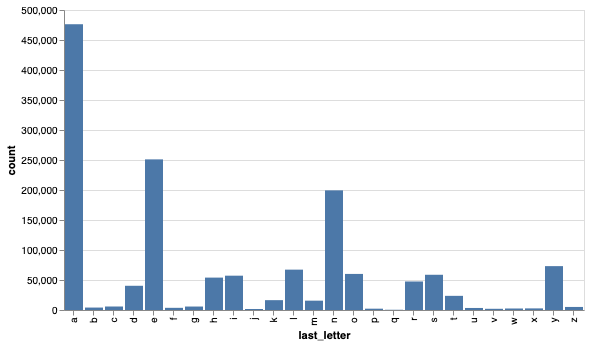

In [269]:
names = all_records['name']
all_records['last_letter'] = [string[-1] for string in names]
last_letter_group = all_records.groupby(["last_letter", "gender"])


last_letter_group = last_letter_group['count'].agg('count').to_frame().reset_index()
#display(last_letter_group)
alt.Chart(last_letter_group).mark_bar().encode(x='last_letter',y='count')


In [259]:
names = all_records['name']
all_records['last_letter'] = [string[-1] for string in names]
last_letter_group = all_records.groupby(["last_letter"])

for item in last_letter_group:
    display(item)
    break
    


('a',               name gender  count  year  single_count last_letter
 1             Anna      F   2604  1880             1           a
 2             Emma      F   2003  1880             1           a
 6              Ida      F   1472  1880             1           a
 8           Bertha      F   1320  1880             1           a
 11           Clara      F   1226  1880             1           a
 ...            ...    ...    ...   ...           ...         ...
 1956829  Tifeoluwa      M      5  2018             1           a
 1956841   Tobiloba      M      5  2018             1           a
 1956890     Vantha      M      5  2018             1           a
 1956955      Yehya      M      5  2018             1           a
 1957035       Zola      M      5  2018             1           a
 
 [504309 rows x 6 columns])

In [246]:
names = all_records['name']
all_records['last_letter'] = [string[-1] for string in names]
last_letter_group = all_records.groupby(["last_letter", "gender"])

for item in last_letter_group:
    #display(item)
    break

last_letter_group = last_letter_group['count'].agg('count').to_frame().reset_index()

last_letter_group = last_letter_group.groupby("last_letter")
for item in last_letter_group:
    display(item)


('a',   last_letter gender   count
 0           a      F  476284
 1           a      M   28025)

('b',   last_letter gender  count
 2           b      F    588
 3           b      M   4059)

('c',   last_letter gender  count
 4           c      F    863
 5           c      M   5814)

('d',   last_letter gender  count
 6           d      F   7101
 7           d      M  40360)

('e',   last_letter gender   count
 8           e      F  251047
 9           e      M   99156)

('f',    last_letter gender  count
 10           f      F    193
 11           f      M   3613)

('g',    last_letter gender  count
 12           g      F   1929
 13           g      M   5768)

('h',    last_letter gender  count
 14           h      F  53990
 15           h      M  22164)

('i',    last_letter gender  count
 16           i      F  57191
 17           i      M  23199)

('j',    last_letter gender  count
 18           j      F    246
 19           j      M   1674)

('k',    last_letter gender  count
 20           k      F   1766
 21           k      M  16405)

('l',    last_letter gender  count
 22           l      F  39370
 23           l      M  67259)

('m',    last_letter gender  count
 24           m      F   4534
 25           m      M  15557)

('n',    last_letter gender   count
 26           n      F  121342
 27           n      M  199404)

('o',    last_letter gender  count
 28           o      F   9153
 29           o      M  60122)

('p',    last_letter gender  count
 30           p      F    389
 31           p      M   2189)

('q',    last_letter gender  count
 32           q      F     52
 33           q      M    675)

('r',    last_letter gender  count
 34           r      F  16326
 35           r      M  47561)

('s',    last_letter gender  count
 36           s      F  21980
 37           s      M  58711)

('t',    last_letter gender  count
 38           t      F  12168
 39           t      M  23587)

('u',    last_letter gender  count
 40           u      F   2515
 41           u      M   3387)

('v',    last_letter gender  count
 42           v      F    134
 43           v      M   2004)

('w',    last_letter gender  count
 44           w      F    782
 45           w      M   2491)

('x',    last_letter gender  count
 46           x      F   1224
 47           x      M   2681)

('y',    last_letter gender  count
 48           y      F  73111
 49           y      M  59570)

('z',    last_letter gender  count
 50           z      F   2249
 51           z      M   5084)